In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_tree
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('train.csv')
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8285054,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6982224,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5481426,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9775968,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2634037,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


In [15]:
df.shape

(54000, 15)

In [9]:
# convert objects to date type
df.DateReported = pd.to_datetime(df.DateReported, format='ISO8601')
df.DateTimeOfAccident = pd.to_datetime(df.DateTimeOfAccident, format='ISO8601')
print(df.DateReported.dtype, df.DateTimeOfAccident.dtype)
df.head()

datetime64[ns, UTC] datetime64[ns, UTC]


,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8285054,2002-04-09 07:00:00+00:00,2002-07-05 00:00:00+00:00,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6982224,1999-01-07 11:00:00+00:00,1999-01-20 00:00:00+00:00,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5481426,1996-03-25 00:00:00+00:00,1996-04-14 00:00:00+00:00,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9775968,2005-06-22 13:00:00+00:00,2005-07-22 00:00:00+00:00,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2634037,1990-08-29 08:00:00+00:00,1990-09-27 00:00:00+00:00,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


In [13]:
df.isna().sum()

ClaimNumber                   0
DateTimeOfAccident            0
DateReported                  0
Age                           0
Gender                        0
MaritalStatus                29
DependentChildren             0
DependentsOther               0
WeeklyWages                   0
PartTimeFullTime              0
HoursWorkedPerWeek            0
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

In [14]:
df.MaritalStatus.unique()

array(['M', 'U', 'S', nan], dtype=object)

In [16]:
# replace nan values with unknown 
df.MaritalStatus = df.MaritalStatus.fillna('Unknown')
df.MaritalStatus.unique()

array(['M', 'U', 'S', 'Unknown'], dtype=object)

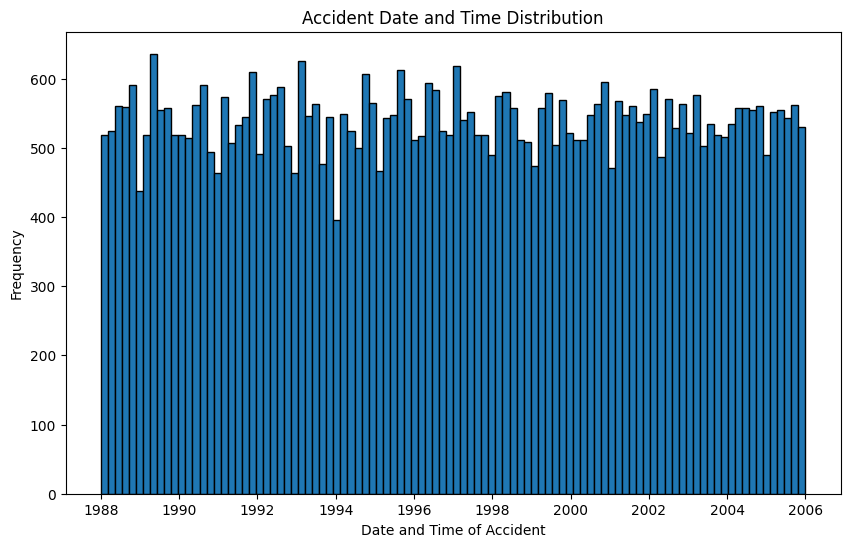

In [27]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.hist(df['DateTimeOfAccident'], bins=100, edgecolor='black')
plt.xlabel('Date and Time of Accident')
plt.ylabel('Frequency')
plt.title('Accident Date and Time Distribution')
# plt.grid(True)  # Optional: Add grid lines
plt.show()

In [37]:
(df.DateReported - df.DateTimeOfAccident).dt.days.lt(0).sum()

np.int64(5)

In [34]:
# get data where difference between reported and time is negative 
df[(df.DateReported - df.DateTimeOfAccident).dt.days.lt(0)]

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1364,WC9881756,2005-07-18 16:00:00+00:00,2005-07-18 00:00:00+00:00,20,M,S,0,0,1800.0,F,56.0,6,MOTOR VEHICLE ACCIDENT BRUISED FACE AND LEFT HAND,10140,9506.429889
16383,WC3162544,1991-06-11 10:00:00+00:00,1991-06-11 00:00:00+00:00,26,F,M,0,0,450.0,F,40.0,5,NORMAL DUTIES LACERATED RIGHT SHIN,500,348.402314
42369,WC6573487,1998-02-21 11:00:00+00:00,1998-02-21 00:00:00+00:00,27,M,S,0,0,200.0,F,38.0,5,STRUCK STEEL CUTTER LACERATED WRISTS LEFT THUMB,500,259.968299
48206,WC7065884,1999-04-05 12:00:00+00:00,1999-04-05 00:00:00+00:00,42,M,U,0,0,80.0,P,20.0,3,HAND SLIPPED STRUCK HAND LACERATED LEFT HAND,500,586.348383
52069,WC7249039,2000-01-21 08:00:00+00:00,2000-01-21 00:00:00+00:00,28,M,M,0,0,200.0,F,38.0,5,PULLING PALLET STRAINED UPPER BACK,10000,5276.452882


In [70]:
df['DateOfAccident'] = df.DateTimeOfAccident.dt.date
df['TimeOfAccident'] = df.DateTimeOfAccident.dt.time

datetime_col_index = df.columns.get_loc('DateTimeOfAccident')

if not isinstance(datetime_col_index, int):
    raise ValueError("`datetime_col_index` must be an integer.")

df.insert(datetime_col_index + 1, 'DateOfAccident', df.pop('DateOfAccident'))
df.insert(datetime_col_index + 2, 'TimeOfAccident', df.pop('TimeOfAccident'))

In [101]:
df.dtypes

ClaimNumber                               object
DateTimeOfAccident           datetime64[ns, UTC]
DateOfAccident                            object
TimeOfAccident                            object
DateReported                 datetime64[ns, UTC]
Age                                        int64
Gender                                    object
MaritalStatus                             object
DependentChildren                          int64
DependentsOther                            int64
WeeklyWages                              float64
PartTimeFullTime                          object
HoursWorkedPerWeek                       float64
DaysWorkedPerWeek                          int64
ClaimDescription                          object
InitialIncurredCalimsCost                  int64
UltimateIncurredClaimCost                float64
dtype: object

In [117]:
# convert objects to date type
df.DateOfAccident = pd.to_datetime(df.DateOfAccident, format='ISO8601', utc=True)
print(df.DateOfAccident.dtype, df.TimeOfAccident.dtype)
df.dtypes

datetime64[ns, UTC] object


ClaimNumber                               object
DateTimeOfAccident           datetime64[ns, UTC]
DateOfAccident               datetime64[ns, UTC]
TimeOfAccident                            object
DateReported                 datetime64[ns, UTC]
Age                                        int64
Gender                                    object
MaritalStatus                             object
DependentChildren                          int64
DependentsOther                            int64
WeeklyWages                              float64
PartTimeFullTime                          object
HoursWorkedPerWeek                       float64
DaysWorkedPerWeek                          int64
ClaimDescription                          object
InitialIncurredCalimsCost                  int64
UltimateIncurredClaimCost                float64
dtype: object

In [107]:
# some accidnts were rported on the smae day but date column doesnt have time
(df.DateReported - df.DateOfAccident).dt.days.lt(0).sum()

np.int64(0)

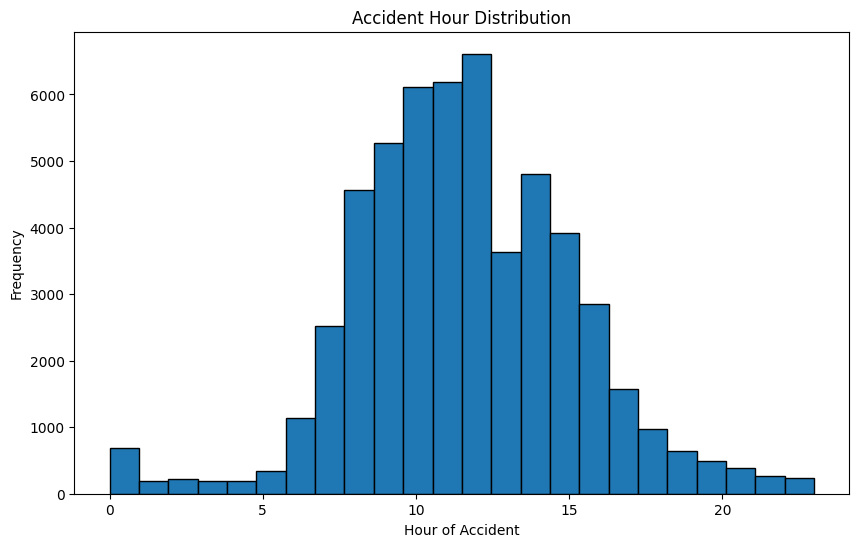

In [114]:
hour_values = [t.hour for t in df['TimeOfAccident']]

plt.figure(figsize=(10, 6))
plt.hist(hour_values, bins=24, edgecolor='black')
plt.xlabel('Hour of Accident')
plt.ylabel('Frequency')
plt.title('Accident Hour Distribution')
plt.show()

In [120]:
df.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,5.400000e+04,5.400000e+04
mean,33.842370,0.119185,0.009944,416.364807,37.735084,4.905759,7.841146e+03,1.100337e+04
std,12.122165,0.517780,0.109348,248.638669,12.568704,0.552129,2.058408e+04,3.339099e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,1.218868e+02
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,7.000000e+02,9.263384e+02
50%,32.000000,0.000000,0.000000,392.200000,38.000000,5.000000,2.000000e+03,3.371242e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9.500000e+03,8.197249e+03
max,81.000000,9.000000,5.000000,7497.000000,640.000000,7.000000,2.000000e+06,4.027136e+06


In [119]:
df.describe(include=['object'])

,ClaimNumber,TimeOfAccident,Gender,MaritalStatus,PartTimeFullTime,ClaimDescription
count,54000,54000,54000,54000,54000,54000
unique,54000,24,3,4,2,28114
top,WC8340658,12:00:00,M,S,F,SLIPPED ON ROLLER TENDONITIS RIGHT SHOULDER
freq,1,6612,41660,26161,49112,289


In [121]:
df.Gender.unique()

array(['M', 'F', 'U'], dtype=object)

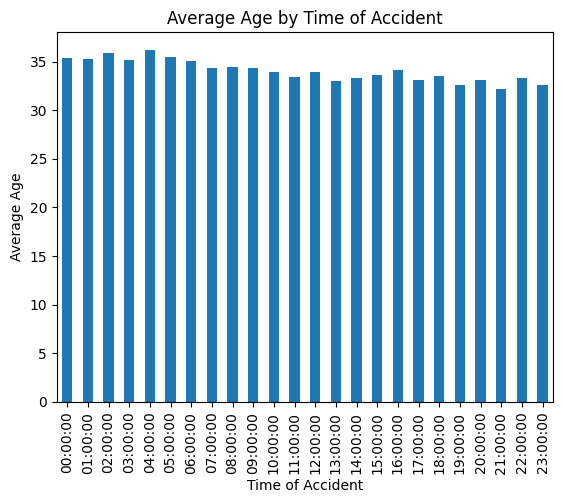

In [127]:
# Group by 'TimeOfAccident' and calculate the average age
grouped_data = df.groupby('TimeOfAccident')['Age'].mean()

# Plot the results
grouped_data.plot(kind='bar', title='Average Age by Time of Accident')
plt.xlabel('Time of Accident')
plt.ylabel('Average Age')
plt.show()

In [129]:
df.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateOfAccident', 'TimeOfAccident',
       'DateReported', 'Age', 'Gender', 'MaritalStatus', 'DependentChildren',
       'DependentsOther', 'WeeklyWages', 'PartTimeFullTime',
       'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClaimDescription',
       'InitialIncurredCalimsCost', 'UltimateIncurredClaimCost'],
      dtype='object')

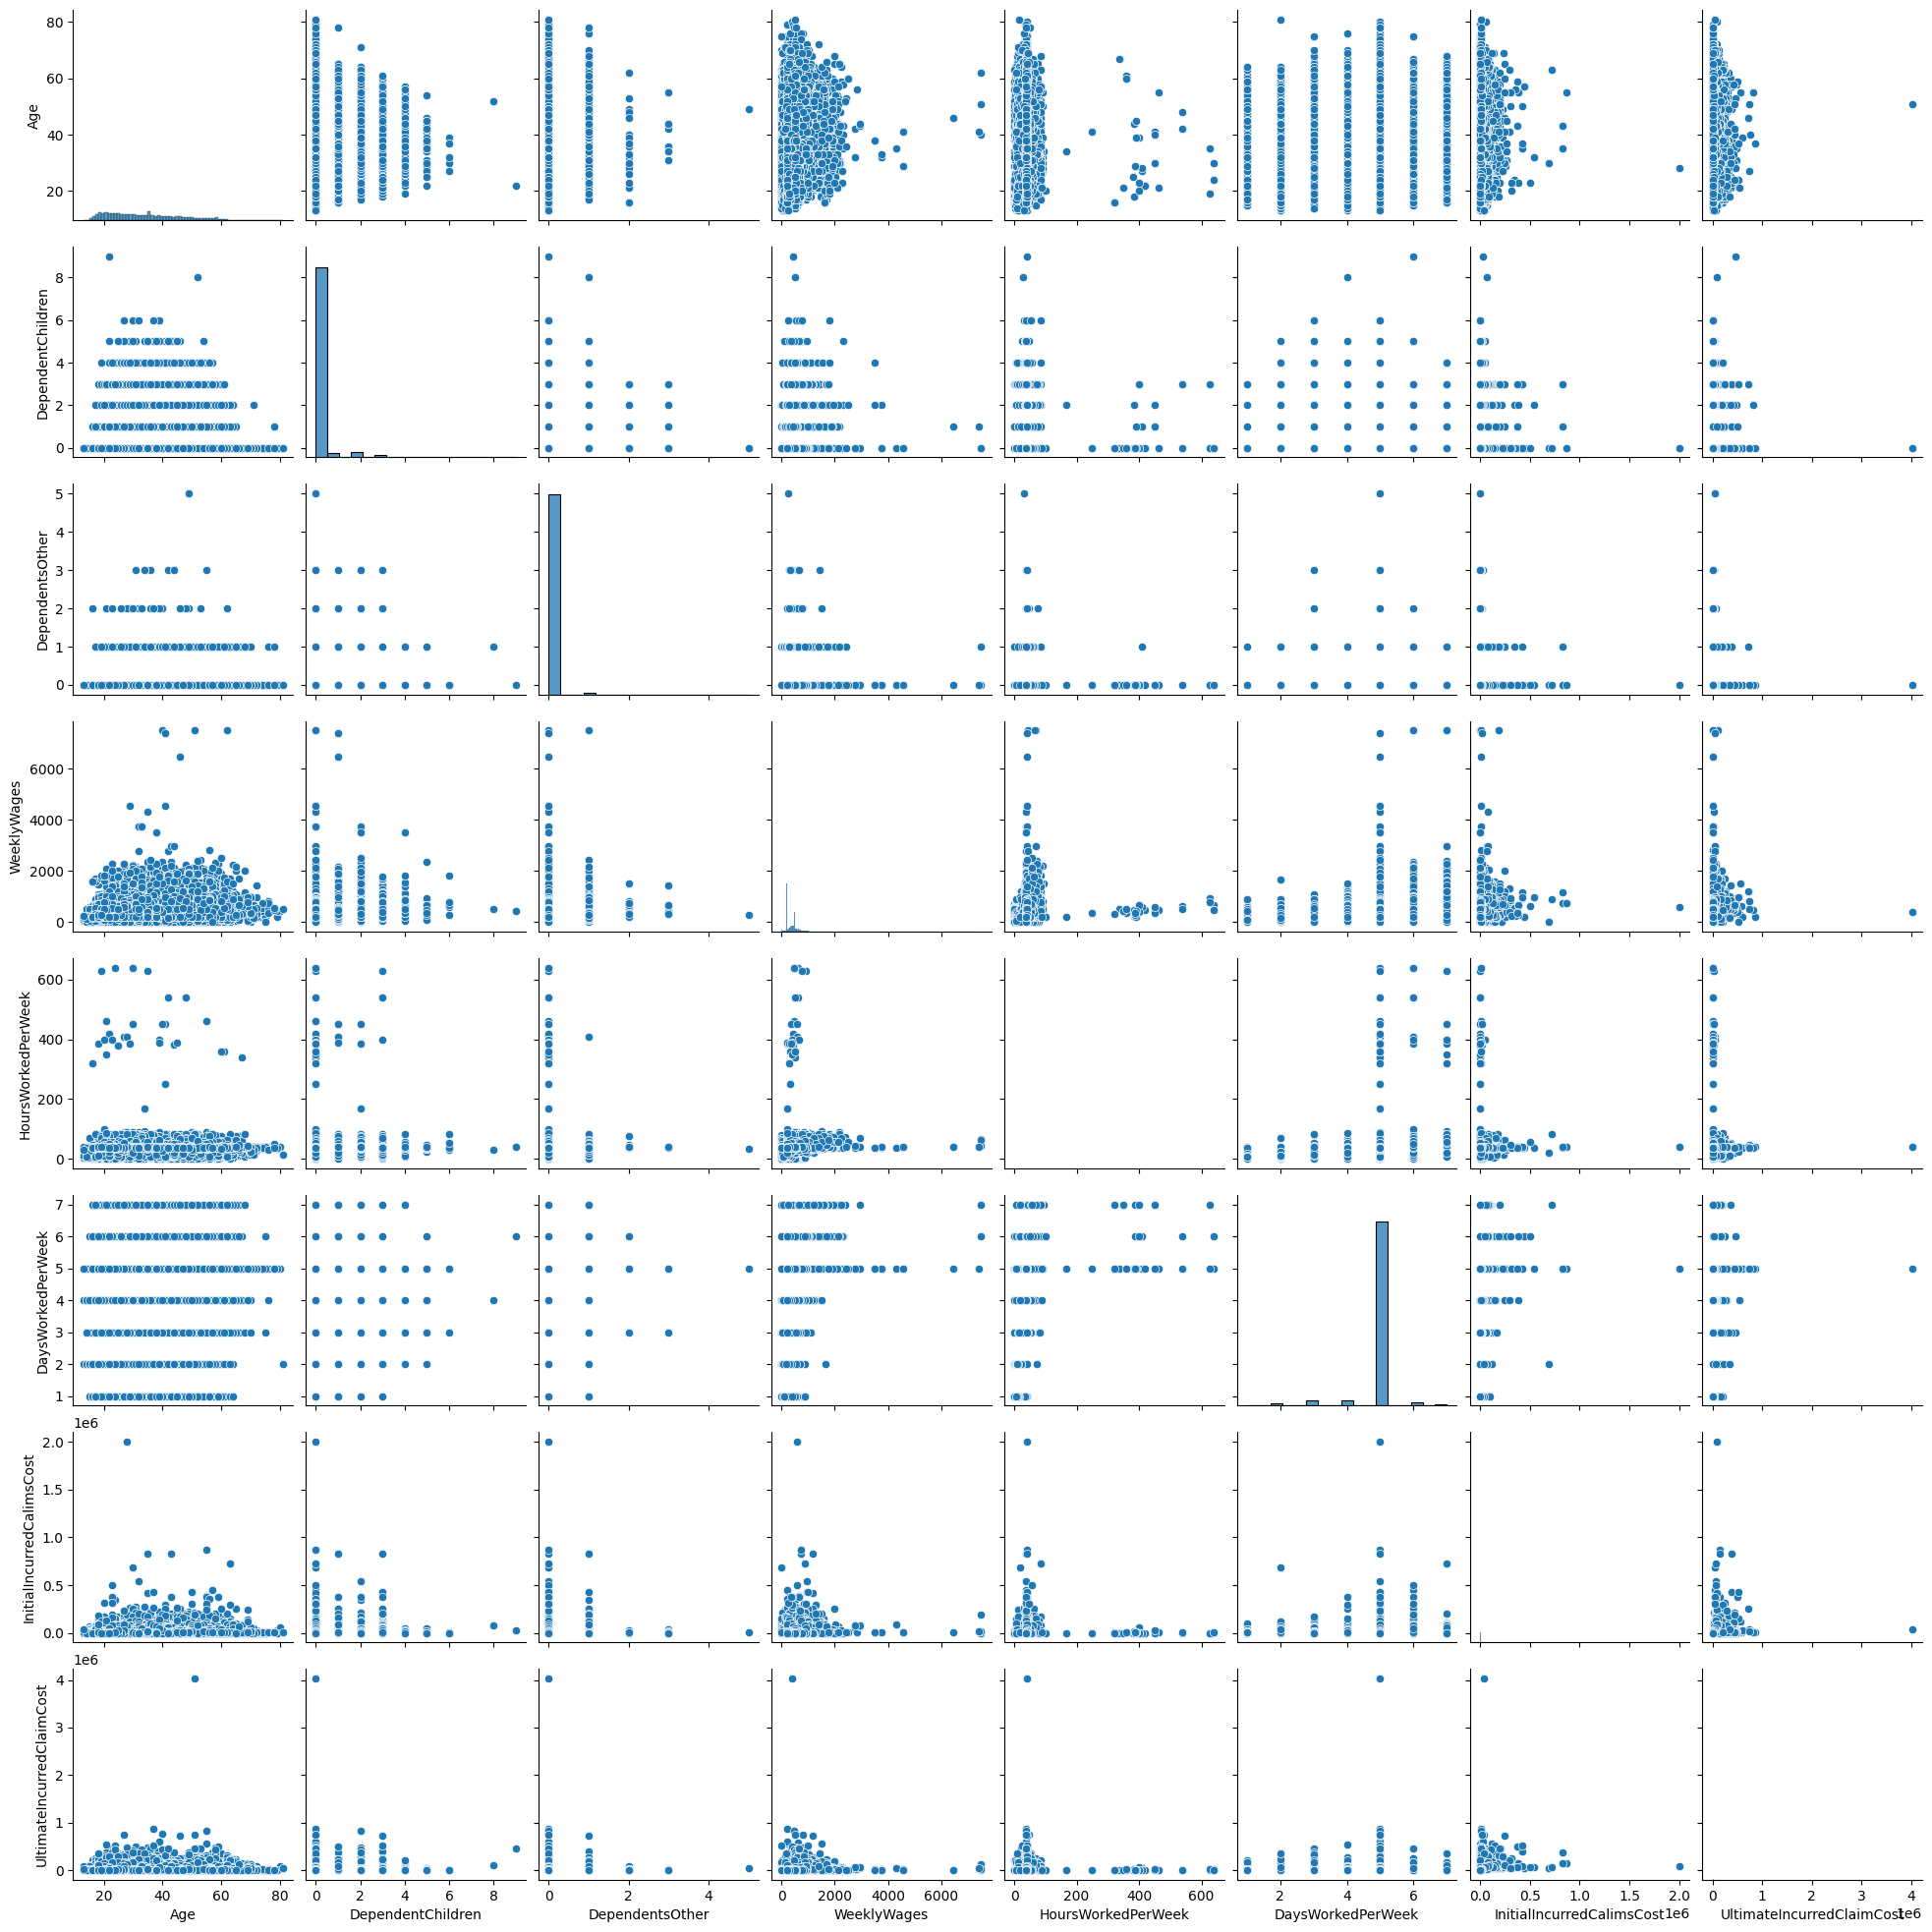

In [130]:
sns.pairplot(df)

In [132]:
df_numeric = df.select_dtypes(include='number')

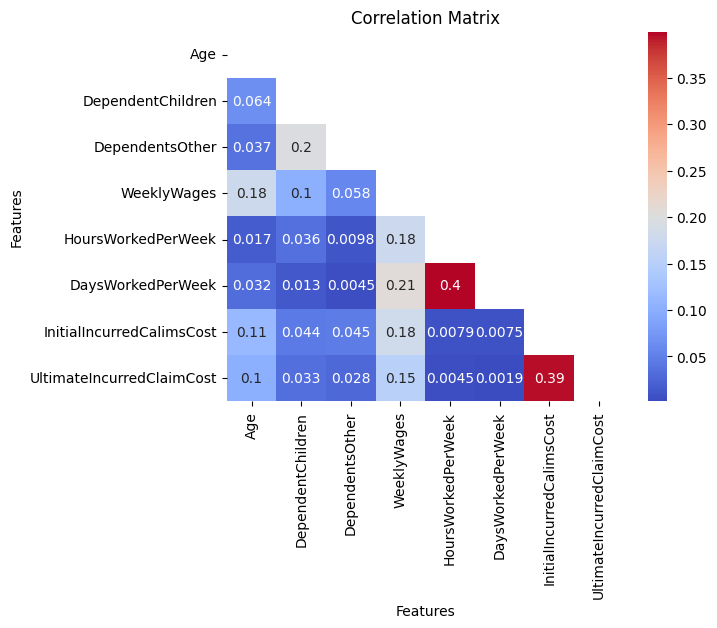

In [143]:
correlation_matrix = df_numeric.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=mask)

# Set the title and labels
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [145]:
df.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateOfAccident', 'TimeOfAccident',
       'DateReported', 'Age', 'Gender', 'MaritalStatus', 'DependentChildren',
       'DependentsOther', 'WeeklyWages', 'PartTimeFullTime',
       'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClaimDescription',
       'InitialIncurredCalimsCost', 'UltimateIncurredClaimCost'],
      dtype='object')

In [158]:
df_encoded = pd.get_dummies(
    df[[
        # "DateTimeOfAccident",
        # "DateOfAccident",
        # "DateReported",
        "Age",
        "Gender",
        "MaritalStatus",
        "DependentChildren",
        "DependentsOther",
        "WeeklyWages",
        "PartTimeFullTime",
        "HoursWorkedPerWeek",
        "DaysWorkedPerWeek",
        "InitialIncurredCalimsCost",
        "UltimateIncurredClaimCost",
    ]],
)
df_encoded.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,MaritalStatus_Unknown,PartTimeFullTime_F,PartTimeFullTime_P
0,48,0,0,500.00,38.0,5,1500,4748.203388,False,True,False,True,False,False,False,True,False
1,43,0,0,509.34,37.5,5,5500,6326.285819,True,False,False,True,False,False,False,True,False
2,30,0,0,709.10,38.0,5,1700,2293.949087,False,True,False,False,False,True,False,True,False
3,41,0,0,555.46,38.0,5,15000,17786.487170,False,True,False,False,True,False,False,True,False
4,36,0,0,377.10,38.0,5,2800,4014.002925,False,True,False,True,False,False,False,True,False


In [159]:
X = df_encoded.drop(columns=['UltimateIncurredClaimCost'])
y = df_encoded.UltimateIncurredClaimCost

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [160]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Figure size 2000x800 with 0 Axes>

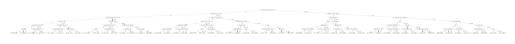

In [170]:
plt.figure(figsize=(20, 8))  # Adjust the width and height as needed
plot_tree(model, num_trees=0)
plt.show()

In [171]:
model.score(X_test, y_test)

0.18095657760507078

In [165]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 27268.56407664782


In [172]:
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Access training and evaluation results
results = model.evals_result()
rmse = results['validation_0']['rmse'][0]
print("RMSE:", rmse)

RMSE: 27890.33603476925


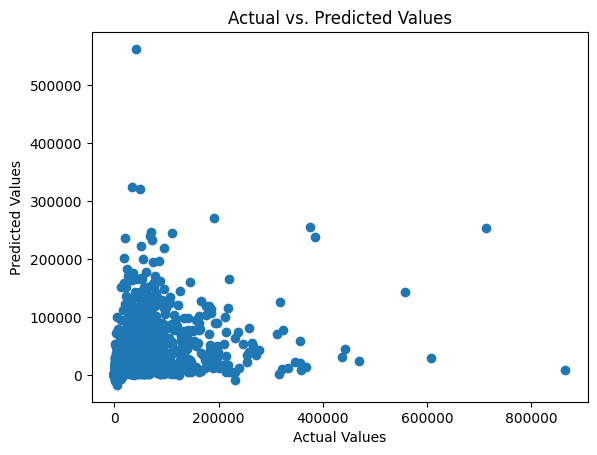

In [173]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

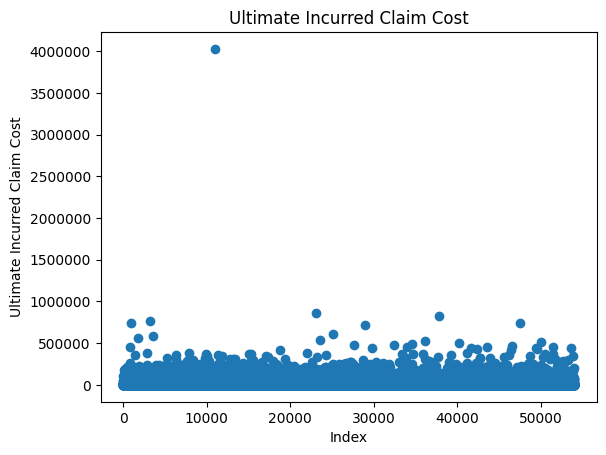

In [184]:
plt.scatter(df_encoded.index, df_encoded.UltimateIncurredClaimCost)
plt.gca().ticklabel_format(axis='y', style='plain', useOffset=False)
plt.xlabel("Index")
plt.ylabel("Ultimate Incurred Claim Cost")
plt.title("Ultimate Incurred Claim Cost")
plt.show()

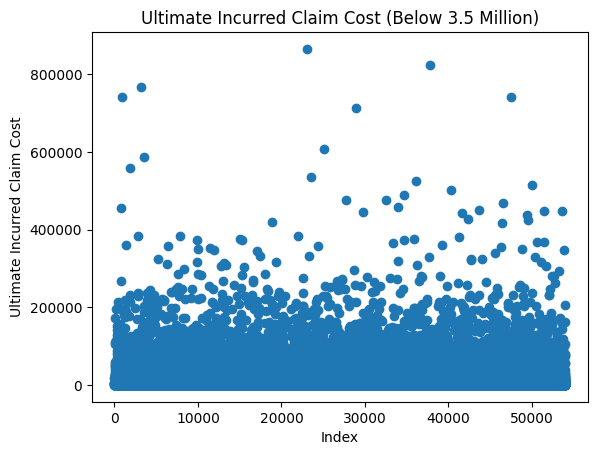

In [183]:
# Filter the DataFrame based on your condition
filtered_df = df_encoded[df_encoded.UltimateIncurredClaimCost < 3500000]

# Extract the index and filtered column
filtered_index = filtered_df.index
filtered_cost = filtered_df["UltimateIncurredClaimCost"]

plt.scatter(filtered_index, filtered_cost)
plt.gca().ticklabel_format(axis='y', style='plain', useOffset=False)
plt.xlabel("Index")
plt.ylabel("Ultimate Incurred Claim Cost")
plt.title("Ultimate Incurred Claim Cost (Below 3.5 Million)")
plt.show()

In [185]:
# Extract feature importance
feature_importance = model.feature_importances_

# Print the feature importance scores
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"{feature}: {importance:.2f}")

Age: 0.07
DependentChildren: 0.07
DependentsOther: 0.02
WeeklyWages: 0.27
HoursWorkedPerWeek: 0.04
DaysWorkedPerWeek: 0.03
InitialIncurredCalimsCost: 0.25
Gender_F: 0.04
Gender_M: 0.00
Gender_U: 0.00
MaritalStatus_M: 0.06
MaritalStatus_S: 0.03
MaritalStatus_U: 0.06
MaritalStatus_Unknown: 0.01
PartTimeFullTime_F: 0.03
PartTimeFullTime_P: 0.00


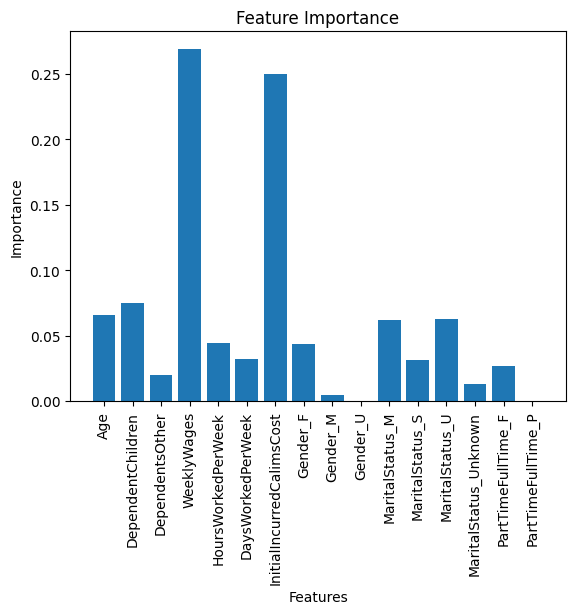

In [187]:
# Plot the feature importance scores
plt.bar(X_train.columns, feature_importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.show()